<a href="https://colab.research.google.com/github/Kumari-Aayushi/OCR_Project/blob/main/TrOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_path = "/content/handwritten500.zip"
extract_path = "/content/handwritten500"

# Ensure clean extraction directory
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Successfully unzipped to:", extract_path)


✅ Successfully unzipped to: /content/handwritten500


In [ ]:
import os

for root, dirs, files in os.walk(extract_path):
    print(f"{root} - {len(files)} files")
    for f in files[:5]:  # Show first 5 files in each folder
        print(f"  - {f}")


/content/handwritten500 - 0 files
/content/handwritten500/handwritten500 - 0 files
/content/handwritten500/handwritten500/english_pages - 60 files
  - a03-071.png
  - a05-108.png
  - a01-007u.png
  - a01-072u.png
  - a01-003.png
/content/handwritten500/handwritten500/english_pages/ground_truth - 60 files
  - a05-053.txt
  - a01-122u.txt
  - a01-003u.txt
  - a05-089.txt
  - a01-102u.txt
/content/handwritten500/handwritten500/hindi_synthetic - 164 files
  - 02-p1-93.png
  - 02-p2-9.png
  - 01_p2.jpg
  - 02-p1-90.png
  - 02-p1-7.png
/content/handwritten500/handwritten500/hindi_synthetic/ground_truth - 164 files
  - 02_p7.txt
  - 02-p2-10.txt
  - 02-p1-40.txt
  - 02-p2-37.txt
  - 02-p2-52.txt
/content/handwritten500/handwritten500/english_lines - 270 files
  - selfMade_177.png
  - selfMade_180.png
  - selfMade_44.png
  - selfMade_276.png
  - selfMade_138.png
/content/handwritten500/handwritten500/english_lines/ground_truth - 270 files
  - selfMade_176.txt
  - selfMade_3.txt
  - selfMade_15

# Prediction of Handwritten Text Image Using TrOCR  

In [ ]:
# ✅ Step 1: Install Required Libraries (if not done yet)
!pip install -U -q transformers torch torchvision torchaudio

# ✅ Step 2: Imports
import os
import glob
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# ✅ Step 3: Define Paths
image_dir = "/content/handwritten500/handwritten500/english_lines"

# ✅ Step 4: Load TrOCR Model
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ✅ Step 5: Prediction Function
def predict_text(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)
    generated_ids = model.generate(inputs.pixel_values)
    pred_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return pred_text.strip()

# ✅ Step 6: Get First 5 Image Paths
image_paths = sorted(glob.glob(os.path.join(image_dir, "*.png")))[:5]

# ✅ Step 7: Predict and Print Text for Each Image
print("🖼️  OCR Predictions on First 5 English Handwritten Line Images:\n")
for path in image_paths:
    pred = predict_text(path)
    print(f"{os.path.basename(path)} → {pred}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 747.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 895.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

🖼️  OCR Predictions on First 5 English Handwritten Line Images:

selfMade_0.png → Machine learning is on idea to learn from examples .
selfMade_1.png → and experience , without being explicitly programmed .
selfMade_10.png → Machine learning is a field which is raised out .
selfMade_100.png → when be applied to understructured data , giving
selfMade_102.png → access to much more input than machine-learning


In [ ]:
# ✅ Step 1: Install Required Libraries (if not already installed)
!pip install -U -q transformers torch torchvision torchaudio

# ✅ Step 2: Imports
import os
import glob
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# ✅ Step 3: Define Paths
image_dir = "/content/handwritten500/handwritten500/english_lines"

# ✅ Step 4: Load TrOCR Model and Processor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ✅ Step 5: Prediction Function
def predict_text(image_path):
    try:
        image = Image.open(image_path).convert("RGB")
        inputs = processor(images=image, return_tensors="pt").to(device)
        generated_ids = model.generate(inputs.pixel_values)
        pred_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        return pred_text.strip()
    except Exception as e:
        return f"[ERROR] {e}"

# ✅ Step 6: Get First 100 Image Paths
image_paths = sorted(glob.glob(os.path.join(image_dir, "*.png")))[:100]

# ✅ Step 7: Predict and Print Text for Each Image
print("🔍 OCR Predictions on First 100 English Handwritten Line Images:\n")
for idx, path in enumerate(image_paths, 1):
    pred = predict_text(path)
    print(f"{idx:03d}. {os.path.basename(path)} → {pred}")


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🔍 OCR Predictions on First 100 English Handwritten Line Images:

001. selfMade_0.png → Machine learning is on idea to learn from examples .
002. selfMade_1.png → and experience , without being explicitly programmed .
003. selfMade_10.png → Machine learning is a field which is raised out .
004. selfMade_100.png → when be applied to understructured data , giving
005. selfMade_102.png → access to much more input than machine-learning
006. selfMade_103.png → " note . This is a recipe for higher performance ! "
007. selfMade_104.png → the more data a not can train on the more .
008. selfMade_105.png → accurate it is likely to be . ( had algorithms ...
009. selfMade_106.png → swained on lots of data can outperform good .
010. selfMade_107.png → grained on lots of data can outperform good .
011. selfMade_109.png → Deep-cawning networks and in an output request a . "
012. selfMade_11.png → # of Artificial intelligence ( A.S. Applying A.S. War.0008000
013. selfMade_110.png → " coglerter or seye

Accuracy of all Hanwritten English Line Images Using TrOCR

In [ ]:
# ✅ Step 1: Install Required Libraries
!pip install -q transformers torch torchvision torchaudio jiwer opencv-python

# ✅ Step 2: Import Libraries
import os
import glob
import cv2
import numpy as np
from PIL import Image
import torch
from tqdm import tqdm
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from jiwer import cer, wer

# ✅ Step 3: Set Dataset Paths
image_dir = "/content/handwritten500/handwritten500/english_lines"
gt_dir = os.path.join(image_dir, "ground_truth")

# ✅ Step 4: Load Improved TrOCR Model (LARGE)
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ✅ Step 5: Enhanced Preprocessing Function (OpenCV)
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    # Resize for consistency
    h, w = img.shape
    if h < 32:
        scale = 32 / h
        img = cv2.resize(img, (int(w * scale), 32), interpolation=cv2.INTER_AREA)

    # Binarize using adaptive threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)

    # Convert to 3-channel RGB for model
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    return Image.fromarray(img_rgb)

# ✅ Step 6: Prediction Function
def predict_text(image_path):
    try:
        image = preprocess_image(image_path)
        inputs = processor(images=image, return_tensors="pt").to(device)
        generated_ids = model.generate(inputs.pixel_values)
        pred_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        # Clean output
        return pred_text.strip().replace("\n", " ").replace("  ", " ")
    except Exception as e:
        return f"[ERROR] {e}"

# ✅ Step 7: Run Evaluation on All 270 Images
image_paths = sorted(glob.glob(os.path.join(image_dir, "*.png")))
predictions, ground_truths = [], []

print("📊 Evaluating with Improved Accuracy...\n")
for path in tqdm(image_paths, desc="🔍 Predicting"):
    base_name = os.path.basename(path).replace(".png", ".txt")
    gt_path = os.path.join(gt_dir, base_name)

    if not os.path.exists(gt_path):
        print(f"⚠️ Missing GT for {base_name}, skipping.")
        continue

    # Ground truth
    with open(gt_path, "r", encoding="utf-8") as f:
        gt_text = f.read().strip().lower()

    # Prediction
    pred_text = predict_text(path).lower()

    ground_truths.append(gt_text)
    predictions.append(pred_text)

# ✅ Step 8: Compute Metrics
character_error = cer(ground_truths, predictions)
word_error = wer(ground_truths, predictions)

character_accuracy = 100 * (1 - character_error)
word_accuracy = 100 * (1 - word_error)

# ✅ Step 9: Print Results
print("\n📈 Improved Evaluation Summary:")
print(f"🧮 Character Error Rate (CER):   {character_error:.4f}")
print(f"✅ Character-Level Accuracy:     {character_accuracy:.2f}%")
print(f"🧮 Word Error Rate (WER):        {word_error:.4f}")
print(f"✅ Word-Level Accuracy:          {word_accuracy:.2f}%")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

📊 Evaluating with Improved Accuracy...




🔍 Predicting: 100%|██████████| 270/270 [57:14<00:00, 12.72s/it]


📈 Improved Evaluation Summary:
🧮 Character Error Rate (CER):   0.0932
✅ Character-Level Accuracy:     90.68%
🧮 Word Error Rate (WER):        0.2796
✅ Word-Level Accuracy:          72.04%


# Prediction of Printed + Handwritten Text Image Using EasyOCR

In [ ]:
!pip install easyocr
!pip install opencv-python matplotlib


  Using cached pyclipper-1.3.0.post6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

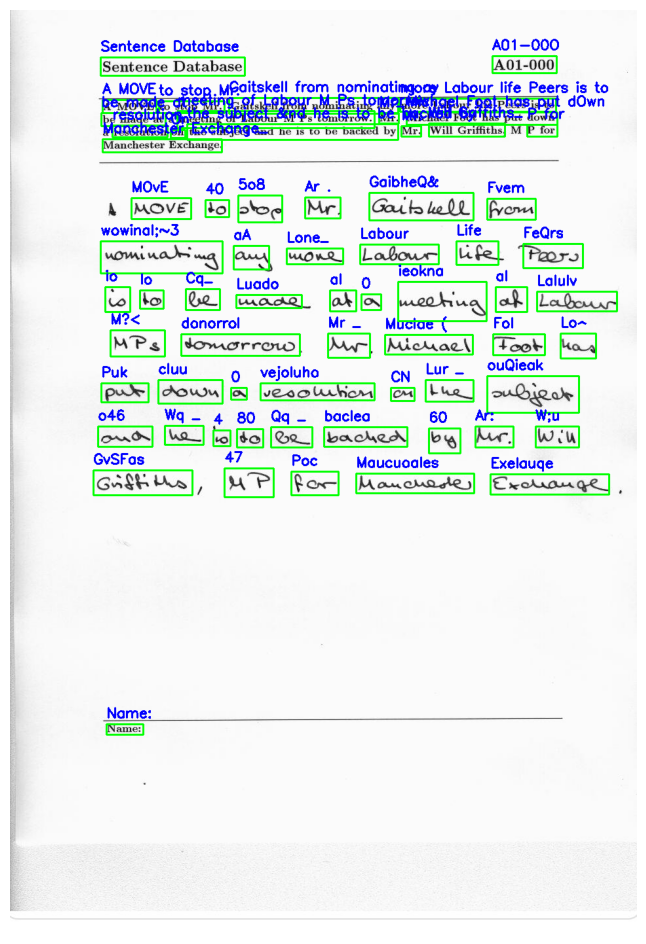

📌 Extracted Text:
Sentence Database
A01-00O
A MOVE
to stop Mr.
Gaitskell from nominating ay
more Labour life Peers is to
be made at
meeting of Labour M Ps tomorrow.
Mr_
Michael Foot has put dOwn
resolution
On
the subject &nd he is to be backed by
Mr.
Will Griffiths_
P for
Manchester Exchange_
MOvE
40
Ar .
GaibheQ&
Fvem
wowinal;~3
Lone_
Labour
Life
FeQrs
io
lo
Cq_
Luado
al
0
al
Lalulv
M?<
donorrol
Muclae (
Fol
cluu
0
vejoluho
CN
Lur _
ouQieak
o46
Wq _
4
80
Qq _
baclea
60
Ar:
W;u
GvSFas
47
Poc
Maucuoales
Exelauqe
Name:
5o8
aA
ieokna
Mr _
Lo^
Puk


In [ ]:
import easyocr
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# Load image
img_path = "/content/whatsapp.jpg"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize OCR reader
reader = easyocr.Reader(['en'], gpu=False)  # CPU-only

# Perform OCR
results = reader.readtext(img_path)

# Show image with boxes
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Show image
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.axis('off')
plt.show()

# Print text
print("📌 Extracted Text:")
for (_, text, _) in results:
    print(text)


# Prediction of Printed + Handwritten Text Image Using Tesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-hin is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
📌 Extracted Text:
Sentence Database A01-000

 

‘A MOVE to stop Mr. Gaitskell from nominating any more Labour life Peers is to
be made at a meeting of Labour M Ps tomorrow. Mr. Michael Foot has put down
a resolution on the subject and he is to be backed by Mr. Will Griffiths, M P for

Manchester Exchange.

k MOVE to sloe Mr. Galbkell from

MOWAL MOI wach OMA ORR Lobowe Ufe_ Poors

wo to G2 wade aka medhiua af Lado
MPs Youcrrono, My, Michael Fook hoy
pre Aown a vesotution on bha sudjede
On Lo to ७० bLackeR by Mr. Wit

Gules , WP Por M

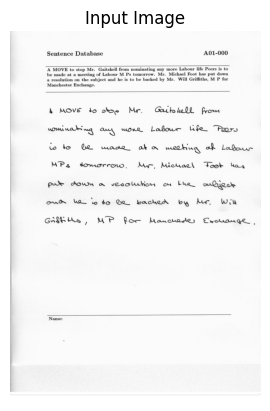

In [ ]:
# STEP 1: Install Tesseract and pytesseract
!apt install tesseract-ocr
!apt install tesseract-ocr-hin
!pip install pytesseract
!pip install pillow

# STEP 2: Import Libraries
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

# STEP 3: Load Your Image
image_path = "/content/whatsapp.jpg"  # Replace with your image
img = Image.open(image_path)

# STEP 4: OCR Text Extraction (English + Hindi)
text = pytesseract.image_to_string(img, lang='eng+hin')
print("📌 Extracted Text:")
print(text)

# STEP 5: Display the Image
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()


# Prediction of Printed + Handwritten Text Image Using TrOCR

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload a full handwritten page image

Saving trrr.png to trrr.png


In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch

# Load model and processor
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import cv2
import numpy as np
from PIL import Image

# Load and preprocess image
img_path = list(uploaded.keys())[0]
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Horizontal line projection to find line regions
horizontal_sum = np.sum(thresh, axis=1)
lines = []
start = None

for i, val in enumerate(horizontal_sum):
    if val > 0 and start is None:
        start = i
    elif val == 0 and start is not None:
        end = i
        if end - start > 15:  # filter short noise
            lines.append((start, end))
        start = None

In [ ]:
from PIL import Image
results = []

for y1, y2 in lines:
    line_img = image[y1:y2, :]
    pil_img = Image.fromarray(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
    pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values

    # Beam decoding for accuracy
    generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
    predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    results.append(predicted_text)

In [ ]:
print("📝 Final Predicted Text:")
for line in results:
    print(line)

📝 Final Predicted Text:


# Prediction of all the Handwritten Paragraph Images using TrOCR

In [ ]:
import zipfile
import os

zip_path = "/content/english_paragraph.zip"
extract_path = "/content/english_paragraph"

# Ensure clean extraction directory
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Successfully unzipped to:", extract_path)

✅ Successfully unzipped to: /content/english_paragraph


In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.4 MB/s eta 0:00:00


In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch

# Load model and processor
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import os
import glob
import cv2
import numpy as np
from PIL import Image
import torch
from tqdm import tqdm
from jiwer import cer, wer

# Define paths (using the extraction path from the unzip step)
image_dir = "/content/english_paragraph/english_paragraph"
gt_dir = os.path.join(image_dir, "ground_truth")

# Ensure model and processor are loaded and model is on the correct device
# Assuming 'model' and 'processor' are already loaded from a previous cell
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Preprocessing function (reusing the one from previous analysis)
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            if end - start > 15:  # filter short noise
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        lines.append((start, len(horizontal_sum)))

    return img, lines


# Prediction function for lines
def predict_text_from_lines(image, lines):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            pil_img = Image.fromarray(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images

    return " ".join(predicted_lines).replace("  ", " ") # Join lines with space and clean up extra spaces


# Get all image paths (including .jpg and .png)
image_paths = sorted(glob.glob(os.path.join(image_dir, "*.png")) + glob.glob(os.path.join(image_dir, "*.jpg")))

if len(image_paths) == 0:
    print(f"No images found in the directory: {image_dir}")
else:
    predictions, ground_truths = [], []

    print(f"📊 Evaluating TrOCR Line-by-Line OCR on {len(image_paths)} images...\n")

    # Wrap image_paths with tqdm for a progress bar
    for image_path in tqdm(image_paths, desc="🔍 Processing Images"):
        base_name = os.path.basename(image_path).replace(".png", ".txt").replace(".jpg", ".txt")
        gt_path = os.path.join(gt_dir, base_name)

        if not os.path.exists(gt_path):
            print(f"\n⚠️ Missing GT for {base_name}, skipping.")
            continue

        # Process image and get lines
        try:
            image, lines = preprocess_image_for_lines(image_path)
            # Predict text from detected lines
            pred_text = predict_text_from_lines(image, lines).lower()

            # Get ground truth text
            with open(gt_path, "r", encoding="utf-8") as f:
                gt_text = f.read().strip().lower()

            ground_truths.append(gt_text)
            predictions.append(pred_text)

        except Exception as e:
            print(f"\n❌ Error processing {os.path.basename(image_path)}: {e}")
            # Append empty strings to maintain list length for metrics calculation
            ground_truths.append("")
            predictions.append("")


    # Compute Metrics
    if len(ground_truths) > 0:
        character_error = cer(ground_truths, predictions)
        word_error = wer(ground_truths, predictions)

        character_accuracy = 100 * (1 - character_error)
        word_accuracy = 100 * (1 - word_error)

        # Print Results
        print("\n📈 Evaluation Summary:")
        print(f"🧮 Character Error Rate (CER):   {character_error:.4f}")
        print(f"✅ Character-Level Accuracy:     {character_accuracy:.2f}%")
        print(f"🧮 Word Error Rate (WER):        {word_error:.4f}")
        print(f"✅ Word-Level Accuracy:          {word_accuracy:.2f}%")
    else:
        print("\n⚠️ No images were processed for evaluation.")

📊 Evaluating TrOCR Line-by-Line OCR on 72 images...



🔍 Processing Images: 100%|██████████| 72/72 [02:38<00:00,  2.20s/it]


📈 Evaluation Summary:
🧮 Character Error Rate (CER):   0.4151
✅ Character-Level Accuracy:     58.49%
🧮 Word Error Rate (WER):        0.8743
✅ Word-Level Accuracy:          12.57%


In [ ]:
# Add your code here and tell me what you want to achieve.

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload a full handwritten page image

Saving p76.jpg to p76.jpg


In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch

# Load model and processor
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import cv2
import numpy as np
from PIL import Image

# Load and preprocess image
img_path = list(uploaded.keys())[0]
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Horizontal line projection to find line regions
horizontal_sum = np.sum(thresh, axis=1)
lines = []
start = None

for i, val in enumerate(horizontal_sum):
    if val > 0 and start is None:
        start = i
    elif val == 0 and start is not None:
        end = i
        if end - start > 15:  # filter short noise
            lines.append((start, end))
        start = None

In [ ]:
from PIL import Image
results = []

for y1, y2 in lines:
    line_img = image[y1:y2, :]
    pil_img = Image.fromarray(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
    pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values

    # Beam decoding for accuracy
    generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
    predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    results.append(predicted_text)

In [ ]:
print("📝 Final Predicted Text:")
for line in results:
    print(line)

📝 Final Predicted Text:
2 1 1 Blinds 2 3
I love to observe birds .
I enjoy their songs .
and colorful feathers .
6 Birdwatching brings .
peace and happiness .


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload a full handwritten page image

Saving a01-132.png to a01-132.png


In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch

# Load model and processor
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import cv2
import numpy as np
from PIL import Image

# Load and preprocess image
img_path = list(uploaded.keys())[0]
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Horizontal line projection to find line regions
horizontal_sum = np.sum(thresh, axis=1)
lines = []
start = None

for i, val in enumerate(horizontal_sum):
    if val > 0 and start is None:
        start = i
    elif val == 0 and start is not None:
        end = i
        if end - start > 15:  # filter short noise
            lines.append((start, end))
        start = None

In [ ]:
from PIL import Image
results = []

for y1, y2 in lines:
    line_img = image[y1:y2, :]
    pil_img = Image.fromarray(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
    pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values

    # Beam decoding for accuracy
    generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
    predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    results.append(predicted_text)

In [ ]:
print("📝 Final Predicted Text:")
for line in results:
    print(line)

📝 Final Predicted Text:
MR. Sentence Database.000520005. A.1-132
# 200 " That cannot continue without either development being limited or an adjustment of 1.000
# been being made in financing . " The Government decided to adjust the financing - which
# ... Mr. Powell claimed was underpinning - not undermining - the service . Answering ... ...
# that the attack on " economic charges " for welfare foods , Mr. Powell said that all these
0 0000 000foods would still be free in families receiving regular National Assistance grants .0003000
# that cannot continue without either ...
of development being limited or an 8-
# adjusting being made in financing . "
# The Government decided to adjust
# the financing - which Mr. Powell
accompanied was underpinning - not
# undermining the service . Answering the
# attack on " economic charges " for welfare
0 0
Categories 1921 births2021 deaths20th century American lawyersAmerican lawyers of the United States Supreme Court of Representatives from Virgin

In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function (reusing the one from previous analysis)
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15:
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        lines.append((start, len(horizontal_sum)))

    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            pil_img = Image.fromarray(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload the 4 images
print("Please upload the 4 images:")
uploaded_files = files.upload()

if len(uploaded_files) == 0:
    print("❌ No files uploaded.")
elif len(uploaded_files) != 4:
     print(f"⚠️ You uploaded {len(uploaded_files)} files. Expected 4 images. Processing the uploaded files anyway.")


# Process each uploaded image
print("\n▶️ Processing uploaded images...")
for filename in uploaded_files.keys():
    print(f"\n--- Processing: {filename} ---")
    try:
        # Save the uploaded file temporarily to process with OpenCV
        with open(filename, 'wb') as f:
            f.write(uploaded_files[filename])

        image, lines = preprocess_image_for_lines(filename)
        if lines:
            predicted_text = predict_text_from_lines(image, lines)
            print(predicted_text)
        else:
            print("No lines detected in this image.")

        # Clean up the temporary file
        os.remove(filename)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing uploaded images.")

✅ Model loaded and on device.
Please upload the 4 images:


Saving a01-000x.png to a01-000x.png
⚠️ You uploaded 1 files. Expected 4 images. Processing the uploaded files anyway.

▶️ Processing uploaded images...

--- Processing: a01-000x.png ---


The channel dimension is ambiguous. Got image shape (1, 2479, 3). Assuming channels are the first dimension. Use the [input_data_format](https://huggingface.co/docs/transformers/main/internal/image_processing_utils#transformers.image_transforms.rescale.input_data_format) parameter to assign the channel dimension.


10, Sentence Database C02-0005.0005000,000,0005000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,
# ... A MOVE to stop Mr. Gaitskell from nominating any more Labour life Peers is to
1942 1944 he made at a meeting of Labour 0MPs tomorrow . Mr. Michael Foot has put down 1950 1951
# a resolution on the subject and he is to be backed by Mr. Will Griffiths . MP for 200,000
1962 Manchester Exchange , 1982 1983 1985 1986 1987
# A MOVE to stop . Mr. Gaitskell from nominating
" any more Labour life Peers is to be made at a
# meeting of Labour MPs tomorrow . Mr. Michael ,
# Foot has put down a resolution on the subject ...
# and he is to be backed by Mr. Will Griffith ,
# UMP for Manchester Exchange .
a member of the National Register of Historic Places listings in the National Register of Historic Places is a
[OCR ERROR] mean must have 1 elements if it is an iterable, got 3

✅ Finished processing uploaded images.


In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function (reusing the one from previous analysis)
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15:
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        lines.append((start, len(horizontal_sum)))

    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            pil_img = Image.fromarray(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
print(f"\n▶️ Processing: {filename}...")
try:
    # Save the uploaded file temporarily to process with OpenCV
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

    image, lines = preprocess_image_for_lines(filename)
    if lines:
        predicted_text = predict_text_from_lines(image, lines)
        print("\n📝 Predicted Text:")
        print(predicted_text)
    else:
        print("No lines detected in this image.")

    # Clean up the temporary file
    os.remove(filename)

except Exception as e:
    print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

✅ Model loaded and on device.
Please upload a single image:


Saving a01-003.png to a01-003.png

▶️ Processing: a01-003.png...

📝 Predicted Text:
# Sentence Database .0005.0005.0005.0005.0005.0005.
# ... . Though they gather some Left-wing support , a large majority of Labour MPs ___
# # are likely to turn down the Foot-Griffiths resolution . Mr. Foot's line will be that as
# ... Labour MPs opposed the Government Bill which brought life peers into existence ,
# that they should not now put forward nominees . He believes that the House of Lords ___
# # should be abolished and that Labour should not take any steps which would appear ...
" 2 0 to " prop up " an out-dated institution , 2000 2001 2002 2003 2004
Although they may gather some Left-wing support , a
# large majority of Labour MPs are likely to
# turn down the Foot-Griffiths resolution . Mr.
# Foot's line will be that as Labour MPs .
to opposed the Government Bill which brought
# life peers into existence , they should not
# now put forward nominees . He believes
# that the House of Lords 

In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function (reusing the one from previous analysis)
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15:
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        lines.append((start, len(horizontal_sum)))

    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            pil_img = Image.fromarray(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
print(f"\n▶️ Processing: {filename}...")
try:
    # Save the uploaded file temporarily to process with OpenCV
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

    image, lines = preprocess_image_for_lines(filename)
    if lines:
        predicted_text = predict_text_from_lines(image, lines)
        print("\n📝 Predicted Text:")
        print(predicted_text)
    else:
        print("No lines detected in this image.")

    # Clean up the temporary file
    os.remove(filename)

except Exception as e:
    print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

Loading TrOCR model and processor...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['enco

✅ Model loaded and on device.
Please upload a single image:


Saving a01-132.png to a01-132 (1).png

▶️ Processing: a01-132 (1).png...

📝 Predicted Text:
MR. Sentence Database.000520005. A.1-132
# 200 " That cannot continue without either development being limited or an adjustment of 1.000
# been being made in financing . " The Government decided to adjust the financing - which
# ... Mr. Powell claimed was underpinning - not undermining - the service . Answering ... ...
# that the attack on " economic charges " for welfare foods , Mr. Powell said that all these
0 0000 000foods would still be free in families receiving regular National Assistance grants .0003000
# that cannot continue without either ...
of development being limited or an 8-
# adjusting being made in financing . "
# The Government decided to adjust
# the financing - which Mr. Powell
accompanied was underpinning - not
# undermining the service . Answering the
# attack on " economic charges " for welfare
0 0
Categories 1921 births2021 deaths20th century American lawyersAmerican lawye

In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function to detect lines
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15: # You can adjust this threshold
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        if len(horizontal_sum) - start > 15: # Check last segment length
             lines.append((start, len(horizontal_sum)))


    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines, processor, model, device):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            # Convert to grayscale and add a channel dimension
            gray_line_img = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
            # Add a channel dimension to the grayscale image
            gray_line_img_3d = np.expand_dims(gray_line_img, axis=-1)
            # Convert to RGB format with 3 identical channels for the processor
            pil_img = Image.fromarray(cv2.cvtColor(gray_line_img_3d, cv2.COLOR_GRAY2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
if filename:
    print(f"\n▶️ Processing: {filename}...")
    try:
        # Save the uploaded file temporarily to process with OpenCV
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        image, lines = preprocess_image_for_lines(filename)
        print(f"✅ Detected {len(lines)} lines.")
        if lines:
            # Pass model and processor to the prediction function
            predicted_text = predict_text_from_lines(image, lines, processor, model, device)
            print("\n📝 Predicted Text:")
            print(predicted_text)
        else:
            print("No lines detected in this image that meet the size threshold.")

        # Clean up the temporary file
        os.remove(filename)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

✅ Model loaded and on device.
Please upload a single image:


Saving a01-000x.png to a01-000x (2).png

▶️ Processing: a01-000x (2).png...
✅ Detected 12 lines.

📝 Predicted Text:
10, Sentence Database C02-0005.0005000,000,0005000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,
# ... A MOVE to stop Mr. Gaitskell from nominating any more Labour life Peers is to
1942 1944 he made at a meeting of Labour 0MPs tomorrow . Mr. Michael Foot has put down 1950 1951
# a resolution on the subject and he is to be backed by Mr. Will Griffiths . MP for 200,000
1962 Manchester Exchange , 1982 1983 1985 1986 1987
# A MOVE to stop . Mr. Gaitskell from nominating
" any more Labour life Peers is to be made at a
# meeting of Labour MPs tomorrow . Mr. Michael ,
# Foot has put down a resolution on the subject ...
# and he is to be backed by Mr. Will Griffith ,
# UMP for Manchester Exchange .
a member of the National Register of Historic Places listings in the National Register of Historic Places is a

✅ Finished processing the image.


In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function to detect lines
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15: # You can adjust this threshold
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        if len(horizontal_sum) - start > 15: # Check last segment length
             lines.append((start, len(horizontal_sum)))


    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines, processor, model, device):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            # Convert to grayscale and add a channel dimension
            gray_line_img = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
            # Add a channel dimension to the grayscale image
            gray_line_img_3d = np.expand_dims(gray_line_img, axis=-1)
            # Convert to RGB format with 3 identical channels for the processor
            pil_img = Image.fromarray(cv2.cvtColor(gray_line_img_3d, cv2.COLOR_GRAY2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
if filename:
    print(f"\n▶️ Processing: {filename}...")
    try:
        # Save the uploaded file temporarily to process with OpenCV
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        image, lines = preprocess_image_for_lines(filename)
        print(f"✅ Detected {len(lines)} lines.")
        if lines:
            # Pass model and processor to the prediction function
            predicted_text = predict_text_from_lines(image, lines, processor, model, device)
            print("\n📝 Predicted Text:")
            print(predicted_text)
        else:
            print("No lines detected in this image that meet the size threshold.")

        # Clean up the temporary file
        os.remove(filename)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

✅ Model loaded and on device.
Please upload a single image:


Saving a01-132x.png to a01-132x.png

▶️ Processing: a01-132x.png...
✅ Detected 16 lines.

📝 Predicted Text:
60- Sentence Database.0005.0005. AOL-1320005
# that continue without either development being limited on adjustment ...
# been being made in financing . " The Government decided to adjust the financing - which
# ... Mr. Powell claimed was underpinning - not undermining - the service . Answering ... ...
# that the attack on " economic charges " for welfare foods , Mr. Powell said that all these
0 0000 000foods would still be free in families receiving regular National Assistance grants .00030003000
" That cannot continue without either development ...
# being limited or an adjustment being made ...
# in financing . " The Government decided to adjust
# the financing - which Mr. Powell claimed was
# underpinning - not undermining - the service ,
# Answering the attack on " economic charges "
# for welfare , Mr. Powell said that all these
# foods would still be free in families recei

In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function to detect lines
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15: # You can adjust this threshold
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        if len(horizontal_sum) - start > 15: # Check last segment length
             lines.append((start, len(horizontal_sum)))


    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines, processor, model, device):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            # Convert to grayscale and add a channel dimension
            gray_line_img = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
            # Add a channel dimension to the grayscale image
            gray_line_img_3d = np.expand_dims(gray_line_img, axis=-1)
            # Convert to RGB format with 3 identical channels for the processor
            pil_img = Image.fromarray(cv2.cvtColor(gray_line_img_3d, cv2.COLOR_GRAY2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
if filename:
    print(f"\n▶️ Processing: {filename}...")
    try:
        # Save the uploaded file temporarily to process with OpenCV
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        image, lines = preprocess_image_for_lines(filename)
        print(f"✅ Detected {len(lines)} lines.")
        if lines:
            # Pass model and processor to the prediction function
            predicted_text = predict_text_from_lines(image, lines, processor, model, device)
            print("\n📝 Predicted Text:")
            print(predicted_text)
        else:
            print("No lines detected in this image that meet the size threshold.")

        # Clean up the temporary file
        os.remove(filename)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

✅ Model loaded and on device.
Please upload a single image:


Saving a01-072x.png to a01-072x.png

▶️ Processing: a01-072x.png...
✅ Detected 15 lines.

📝 Predicted Text:
2 . Sentence Database.0005.0005. AOL-072.
1942 1953 These support costs are a big drain on America's dollar reserves . Dr. Adenauer's 1953 1956
1800 1899 answer is the once-and-all cash offer of 35million . President Kennedy's rejection 1900 1900
# 100 of it is a painful blow to the West German Government . It will now have to pay ... .
# more - and increase taxation to do so - or run the obvious risks in upsetting the new
0 0000 American administration .0003000500050005000
" There support costs are a big draw on America's
# better revenues . Dr. Adenauer's answer in the 1960s .
# once - and - for - all cash offer of 357million . President #
# Kennedy's rejection of it is a painful blow to the 1/2
# that German Government . It will now have to pay 1 000
# more - and increase taxation to do so - or # ...
# even the obvious risks in upsetting the war ...
t. American administration 

In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function to detect lines
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15: # You can adjust this threshold
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        if len(horizontal_sum) - start > 15: # Check last segment length
             lines.append((start, len(horizontal_sum)))


    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines, processor, model, device):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            # Convert to grayscale and add a channel dimension
            gray_line_img = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
            # Add a channel dimension to the grayscale image
            gray_line_img_3d = np.expand_dims(gray_line_img, axis=-1)
            # Convert to RGB format with 3 identical channels for the processor
            pil_img = Image.fromarray(cv2.cvtColor(gray_line_img_3d, cv2.COLOR_GRAY2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
if filename:
    print(f"\n▶️ Processing: {filename}...")
    try:
        # Save the uploaded file temporarily to process with OpenCV
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        image, lines = preprocess_image_for_lines(filename)
        print(f"✅ Detected {len(lines)} lines.")
        if lines:
            # Pass model and processor to the prediction function
            predicted_text = predict_text_from_lines(image, lines, processor, model, device)
            print("\n📝 Predicted Text:")
            print(predicted_text)
        else:
            print("No lines detected in this image that meet the size threshold.")

        # Clean up the temporary file
        os.remove(filename)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

✅ Model loaded and on device.
Please upload a single image:


Saving p100.jpg to p100.jpg

▶️ Processing: p100.jpg...
✅ Detected 2 lines.

📝 Predicted Text:
dispersed in the Yellow Belt
trourellerine and for stock

✅ Finished processing the image.


In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function to detect lines
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15: # You can adjust this threshold
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        if len(horizontal_sum) - start > 15: # Check last segment length
             lines.append((start, len(horizontal_sum)))


    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines, processor, model, device):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            # Convert to grayscale and add a channel dimension
            gray_line_img = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
            # Add a channel dimension to the grayscale image
            gray_line_img_3d = np.expand_dims(gray_line_img, axis=-1)
            # Convert to RGB format with 3 identical channels for the processor
            pil_img = Image.fromarray(cv2.cvtColor(gray_line_img_3d, cv2.COLOR_GRAY2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
if filename:
    print(f"\n▶️ Processing: {filename}...")
    try:
        # Save the uploaded file temporarily to process with OpenCV
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        image, lines = preprocess_image_for_lines(filename)
        print(f"✅ Detected {len(lines)} lines.")
        if lines:
            # Pass model and processor to the prediction function
            predicted_text = predict_text_from_lines(image, lines, processor, model, device)
            print("\n📝 Predicted Text:")
            print(predicted_text)
        else:
            print("No lines detected in this image that meet the size threshold.")

        # Clean up the temporary file
        os.remove(filename)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

✅ Model loaded and on device.
Please upload a single image:


Saving p71.jpg to p71.jpg

▶️ Processing: p71.jpg...
✅ Detected 8 lines.

📝 Predicted Text:
2 1 Travel -
I enjoy travelling .
. Visiting new places .
experiencing different .
cultures , and try
local cuisine . The
excitement of future .
trips .000

✅ Finished processing the image.


In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function to detect lines
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15: # You can adjust this threshold
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        if len(horizontal_sum) - start > 15: # Check last segment length
             lines.append((start, len(horizontal_sum)))


    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines, processor, model, device):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            # Convert to grayscale and add a channel dimension
            gray_line_img = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
            # Add a channel dimension to the grayscale image
            gray_line_img_3d = np.expand_dims(gray_line_img, axis=-1)
            # Convert to RGB format with 3 identical channels for the processor
            pil_img = Image.fromarray(cv2.cvtColor(gray_line_img_3d, cv2.COLOR_GRAY2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
if filename:
    print(f"\n▶️ Processing: {filename}...")
    try:
        # Save the uploaded file temporarily to process with OpenCV
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        image, lines = preprocess_image_for_lines(filename)
        print(f"✅ Detected {len(lines)} lines.")
        if lines:
            # Pass model and processor to the prediction function
            predicted_text = predict_text_from_lines(image, lines, processor, model, device)
            print("\n📝 Predicted Text:")
            print(predicted_text)
        else:
            print("No lines detected in this image that meet the size threshold.")

        # Clean up the temporary file
        os.remove(filename)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

✅ Model loaded and on device.
Please upload a single image:


Saving p32.jpg to p32.jpg

▶️ Processing: p32.jpg...
✅ Detected 4 lines.

📝 Predicted Text:
# Never rush for a position .
6 Further information
# your knowledge and politeness ,
# not for your designation .

✅ Finished processing the image.


In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function to detect lines
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15: # You can adjust this threshold
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        if len(horizontal_sum) - start > 15: # Check last segment length
             lines.append((start, len(horizontal_sum)))


    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines, processor, model, device):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            # Convert to grayscale and add a channel dimension
            gray_line_img = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
            # Add a channel dimension to the grayscale image
            gray_line_img_3d = np.expand_dims(gray_line_img, axis=-1)
            # Convert to RGB format with 3 identical channels for the processor
            pil_img = Image.fromarray(cv2.cvtColor(gray_line_img_3d, cv2.COLOR_GRAY2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
if filename:
    print(f"\n▶️ Processing: {filename}...")
    try:
        # Save the uploaded file temporarily to process with OpenCV
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        image, lines = preprocess_image_for_lines(filename)
        print(f"✅ Detected {len(lines)} lines.")
        if lines:
            # Pass model and processor to the prediction function
            predicted_text = predict_text_from_lines(image, lines, processor, model, device)
            print("\n📝 Predicted Text:")
            print(predicted_text)
        else:
            print("No lines detected in this image that meet the size threshold.")

        # Clean up the temporary file
        os.remove(filename)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

✅ Model loaded and on device.
Please upload a single image:


Saving p29.jpg to p29.jpg

▶️ Processing: p29.jpg...
✅ Detected 2 lines.

📝 Predicted Text:
" Fashion is also related to the
probably fashion . Orlando land-disclosed

✅ Finished processing the image.


In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function to detect lines
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15: # You can adjust this threshold
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        if len(horizontal_sum) - start > 15: # Check last segment length
             lines.append((start, len(horizontal_sum)))


    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines, processor, model, device):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            # Convert to grayscale and add a channel dimension
            gray_line_img = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
            # Add a channel dimension to the grayscale image
            gray_line_img_3d = np.expand_dims(gray_line_img, axis=-1)
            # Convert to RGB format with 3 identical channels for the processor
            pil_img = Image.fromarray(cv2.cvtColor(gray_line_img_3d, cv2.COLOR_GRAY2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
if filename:
    print(f"\n▶️ Processing: {filename}...")
    try:
        # Save the uploaded file temporarily to process with OpenCV
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        image, lines = preprocess_image_for_lines(filename)
        print(f"✅ Detected {len(lines)} lines.")
        if lines:
            # Pass model and processor to the prediction function
            predicted_text = predict_text_from_lines(image, lines, processor, model, device)
            print("\n📝 Predicted Text:")
            print(predicted_text)
        else:
            print("No lines detected in this image that meet the size threshold.")

        # Clean up the temporary file
        os.remove(filename)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

✅ Model loaded and on device.
Please upload a single image:


Saving p37.jpg to p37.jpg

▶️ Processing: p37.jpg...
✅ Detected 8 lines.

📝 Predicted Text:
Not logged inTalkContributionsCreate accountLog in
What links here has multiple issues Please help improve it or discuss these issues on
Sometimes all you can do is not think .
# not wonder , not imagine , not obsess ...
must breathe , and have faith that
everything will work out for the best-
0 1
0 2

✅ Finished processing the image.


In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function to detect lines
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15: # You can adjust this threshold
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        if len(horizontal_sum) - start > 15: # Check last segment length
             lines.append((start, len(horizontal_sum)))


    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines, processor, model, device):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            # Convert to grayscale and add a channel dimension
            gray_line_img = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
            # Add a channel dimension to the grayscale image
            gray_line_img_3d = np.expand_dims(gray_line_img, axis=-1)
            # Convert to RGB format with 3 identical channels for the processor
            pil_img = Image.fromarray(cv2.cvtColor(gray_line_img_3d, cv2.COLOR_GRAY2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
if filename:
    print(f"\n▶️ Processing: {filename}...")
    try:
        # Save the uploaded file temporarily to process with OpenCV
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        image, lines = preprocess_image_for_lines(filename)
        print(f"✅ Detected {len(lines)} lines.")
        if lines:
            # Pass model and processor to the prediction function
            predicted_text = predict_text_from_lines(image, lines, processor, model, device)
            print("\n📝 Predicted Text:")
            print(predicted_text)
        else:
            print("No lines detected in this image that meet the size threshold.")

        # Clean up the temporary file
        os.remove(filename)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

✅ Model loaded and on device.
Please upload a single image:


Saving a05-062.png to a05-062.png

▶️ Processing: a05-062.png...
✅ Detected 17 lines.

📝 Predicted Text:
2 . Sentence Database.0005.0005.0005.0005.0005.
# ... with a vigour and authority which delighted old Parliamentary friends and foes alike ,
# the Earl of Avon , the former Sir Anthony Eden , in his maiden speech in the House of
# # Lords last night , gave a warning that appeasement over Berlin could only lead to war . "
# ... . To stand firm , he declared , was not to invite war , but the surestway to avert it .
2 . With a vigour and authority which delighted
# old Parliamentary friends and foes alike ,
# the Earl of Avon , the former Sir Anthony .
1962 Edwin in his maiden speech in the House .
# of Lords last night , gave a warning
# that # appeasement over Berlin could
# only lead to war . To stand from , he
# declined , was not to invite war , But
# the surest way to meet it .
a b c d e f g h. Nature of Australia Department of Agriculture and the Government of Australia
# that i

In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function to detect lines
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15: # You can adjust this threshold
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        if len(horizontal_sum) - start > 15: # Check last segment length
             lines.append((start, len(horizontal_sum)))


    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines, processor, model, device):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            # Convert to grayscale and add a channel dimension
            gray_line_img = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
            # Add a channel dimension to the grayscale image
            gray_line_img_3d = np.expand_dims(gray_line_img, axis=-1)
            # Convert to RGB format with 3 identical channels for the processor
            pil_img = Image.fromarray(cv2.cvtColor(gray_line_img_3d, cv2.COLOR_GRAY2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
if filename:
    print(f"\n▶️ Processing: {filename}...")
    try:
        # Save the uploaded file temporarily to process with OpenCV
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        image, lines = preprocess_image_for_lines(filename)
        print(f"✅ Detected {len(lines)} lines.")
        if lines:
            # Pass model and processor to the prediction function
            predicted_text = predict_text_from_lines(image, lines, processor, model, device)
            print("\n📝 Predicted Text:")
            print(predicted_text)
        else:
            print("No lines detected in this image that meet the size threshold.")

        # Clean up the temporary file
        os.remove(filename)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

Loading TrOCR model and processor...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Model loaded and on device.
Please upload a single image:


Saving p15.jpg to p15.jpg

▶️ Processing: p15.jpg...
✅ Detected 7 lines.

📝 Predicted Text:
1 . The Importance of Coding
exclaiming to code is an
2essential skill . It allows
# for the creation of limp ...
2 Performances problem , solving
ping to bring ideas to life .
# through programming .

✅ Finished processing the image.


In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import os

# Load model and processor (reusing if already loaded)
try:
    processor
    model
except NameError:
    print("Loading TrOCR model and processor...")
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("✅ Model loaded and on device.")

# Preprocessing function to detect lines
def preprocess_image_for_lines(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Using OTSU's thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Horizontal line projection to find line regions
    horizontal_sum = np.sum(thresh, axis=1)
    lines = []
    start = None

    for i, val in enumerate(horizontal_sum):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            end = i
            # Filter short noise lines, adjust threshold (e.g., 15) if needed
            if end - start > 15: # You can adjust this threshold
                lines.append((start, end))
            start = None
    # Add the last line if the image doesn't end with a zero sum
    if start is not None:
        if len(horizontal_sum) - start > 15: # Check last segment length
             lines.append((start, len(horizontal_sum)))


    return img, lines

# Prediction function for lines
def predict_text_from_lines(image, lines, processor, model, device):
    predicted_lines = []
    for y1, y2 in lines:
        line_img = image[y1:y2, :]
        # Ensure the line image is valid before processing
        if line_img.shape[0] > 0 and line_img.shape[1] > 0:
            # Convert to grayscale and add a channel dimension
            gray_line_img = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
            # Add a channel dimension to the grayscale image
            gray_line_img_3d = np.expand_dims(gray_line_img, axis=-1)
            # Convert to RGB format with 3 identical channels for the processor
            pil_img = Image.fromarray(cv2.cvtColor(gray_line_img_3d, cv2.COLOR_GRAY2RGB))
            try:
                pixel_values = processor(images=pil_img, return_tensors="pt").pixel_values.to(device)
                # Beam decoding for accuracy
                generated_ids = model.generate(pixel_values, max_length=128, num_beams=5, early_stopping=True)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                predicted_lines.append(predicted_text.strip())
            except Exception as e:
                predicted_lines.append(f"[OCR ERROR] {e}")
        else:
            predicted_lines.append("") # Append empty string for invalid line images


    return "\n".join(predicted_lines) # Join lines with newline for better readability

# Upload a single image
print("Please upload a single image:")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ No file uploaded.")
elif len(uploaded) > 1:
     print(f"⚠️ You uploaded {len(uploaded)} files. Expected 1 image. Processing the first uploaded file.")
     filename = list(uploaded.keys())[0]
else:
    filename = list(uploaded.keys())[0]


# Process the uploaded image
if filename:
    print(f"\n▶️ Processing: {filename}...")
    try:
        # Save the uploaded file temporarily to process with OpenCV
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        image, lines = preprocess_image_for_lines(filename)
        print(f"✅ Detected {len(lines)} lines.")
        if lines:
            # Pass model and processor to the prediction function
            predicted_text = predict_text_from_lines(image, lines, processor, model, device)
            print("\n📝 Predicted Text:")
            print(predicted_text)
        else:
            print("No lines detected in this image that meet the size threshold.")

        # Clean up the temporary file
        os.remove(filename)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

print("\n✅ Finished processing the image.")

✅ Model loaded and on device.
Please upload a single image:


Saving p46.jpg to p46.jpg

▶️ Processing: p46.jpg...
✅ Detected 8 lines.

📝 Predicted Text:
2 1 My career Goals .
My career goal is to become
a dato scientist in the future .
1 proofess sed an drawing complex ...
datasets . I serve an joy as it a
prime to extract valuable insights .
" I aim to contribute to meaning -
full projects that have impact .

✅ Finished processing the image.
